<a href="https://colab.research.google.com/github/kousalyaogirala26/HDS5210_InClasskousalya/blob/master/Copy_of_week13_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Week 13 Programming Assignment

As you're working on identifying data for your final project, it's helpful to spend some time exploring your various data files.  For this week's assignment, I'd like you to take a few of the ideas from the the lectures, review assignment, and tonight's lecture to start exploring the data you plan to use for the final project.

For the following activities, you can use just one of the data files that you've identified, or you can do the activities using different data files.  That's up to you.  Check in your data file along with this exercise. Please describe what you're doing in a Markdown cell or in the comments of your code.  When you've completed the assignment, submit it as normal.

### 1. Basic Statistics

Use Python to read in your data file and show many rows and columns your data has.

In [1]:
import pandas as pd

# Load the dataset
file_path = 'community_health_evaluation_dataset.csv'  # Replace with your file path
data = pd.read_csv(file_path)

# Display the number of rows and columns
rows, columns = data.shape
print(f"The dataset contains {rows} rows and {columns} columns.")


The dataset contains 347 rows and 12 columns.


### 2. Data Diversity

Use Python to identify how many unique values each column in your data has.  Use Python to identify which column has the greatest number of distinct values (aka the most diversity)?  If your data has a unique identifier (e.g. a person or visit or record ID) then find the column with the next most number of unique values.

In [2]:
import pandas as pd

# Load the dataset
file_path = 'community_health_evaluation_dataset.csv'  # Replace with your file path
data = pd.read_csv(file_path)

# Count unique values in each column
unique_counts = data.nunique()

# Identify the column with the greatest number of distinct values
most_diverse_column = unique_counts.idxmax()
most_diverse_count = unique_counts.max()

# Exclude unique identifier columns and find the next most diverse column
# Assuming unique identifier columns may have "ID" in their name
potential_columns = unique_counts[unique_counts < most_diverse_count]
next_most_diverse_column = potential_columns.idxmax()
next_most_diverse_count = potential_columns.max()

# Print results
print("Unique values in each column:")
print(unique_counts)
print(f"\nColumn with the greatest number of distinct values: {most_diverse_column} ({most_diverse_count} unique values)")
print(f"Column with the next most distinct values: {next_most_diverse_column} ({next_most_diverse_count} unique values)")


Unique values in each column:
Participant ID                 347
Age                             52
Gender                           2
SES                              4
Service Type                     3
Visit Frequency                  3
Step Frequency (steps/min)      40
Stride Length (m)               51
Joint Angle (°)                316
EMG Activity                     3
Patient Satisfaction (1-10)     10
Quality of Life Score           50
dtype: int64

Column with the greatest number of distinct values: Participant ID (347 unique values)
Column with the next most distinct values: Joint Angle (°) (316 unique values)


### 3. Data Redundancy

Use Python to identify any columns in your data where the value for every row is the same.  For example, if you had a gender column and all the rows said 'M', then you would want to write the code that helped you determine that.

In [3]:
import pandas as pd

# Load the dataset
file_path = 'community_health_evaluation_dataset.csv'  # Replace with your file path
data = pd.read_csv(file_path)

# Identify columns where all rows have the same value
constant_columns = [col for col in data.columns if data[col].nunique() == 1]

# Print the results
if constant_columns:
    print("Columns where all rows have the same value:")
    print(constant_columns)
else:
    print("No columns have the same value for every row.")


No columns have the same value for every row.


### 4. Range of Values

Your data almost certainly has some numeric columns that can be summed or averaged.  Create a histogram that shows the distribution of values for this column.

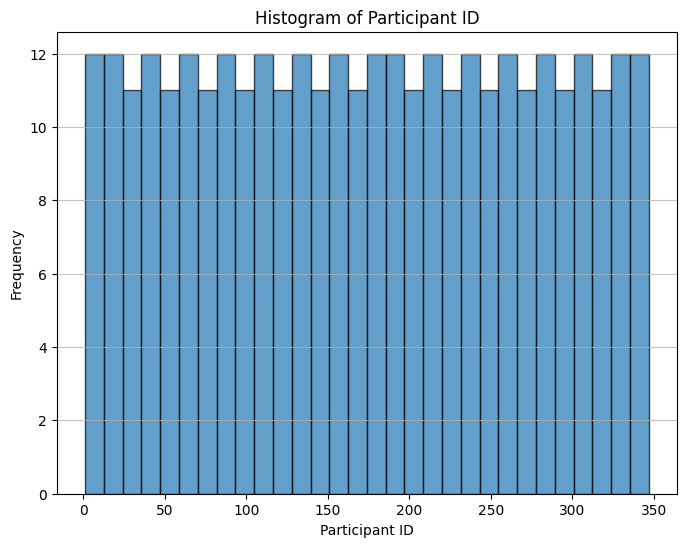

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
file_path = 'community_health_evaluation_dataset.csv'  # Replace with your file path
data = pd.read_csv(file_path)

# Identify numeric columns in the dataset
numeric_columns = data.select_dtypes(include=['number']).columns

# Create a histogram for the first numeric column if available
if not numeric_columns.empty:
    column_to_plot = numeric_columns[0]  # Use the first numeric column
    plt.figure(figsize=(8, 6))
    plt.hist(data[column_to_plot].dropna(), bins=30, edgecolor='black', alpha=0.7)
    plt.title(f"Histogram of {column_to_plot}")
    plt.xlabel(column_to_plot)
    plt.ylabel("Frequency")
    plt.grid(axis='y', alpha=0.75)
    plt.show()
else:
    print("No numeric columns found in the dataset.")



### 5. Discussion

Do any additional exploration of this data that you think may be interesting and include your code here.  Then go onto Slack and make a post about what you've observed.  Share your observation.  Share your code, if you like.  Share a screenshot of the data or a chart based on the data.

Then comment on at least two other people's observations that they share on Slack.  (Use the reply as thread option in Slack to keep the conversation organized.)

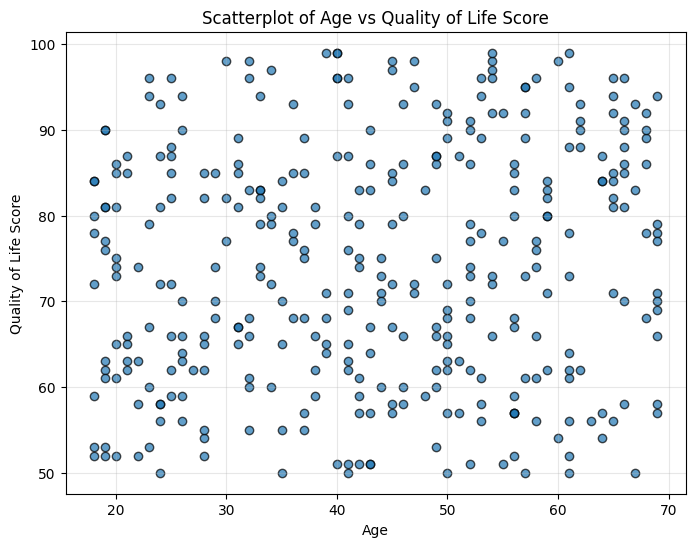

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
file_path = 'community_health_evaluation_dataset.csv'  # Replace with your file path
data = pd.read_csv(file_path)

# Create a scatterplot for Age vs Quality of Life Score
if 'Age' in data.columns and 'Quality of Life Score' in data.columns:
    plt.figure(figsize=(8, 6))
    plt.scatter(data['Age'], data['Quality of Life Score'], alpha=0.7, edgecolor='k')
    plt.title("Scatterplot of Age vs Quality of Life Score")
    plt.xlabel("Age")
    plt.ylabel("Quality of Life Score")
    plt.grid(alpha=0.3)
    plt.show()
else:
    print("Columns 'Age' and 'Quality of Life Score' are not available in the dataset.")

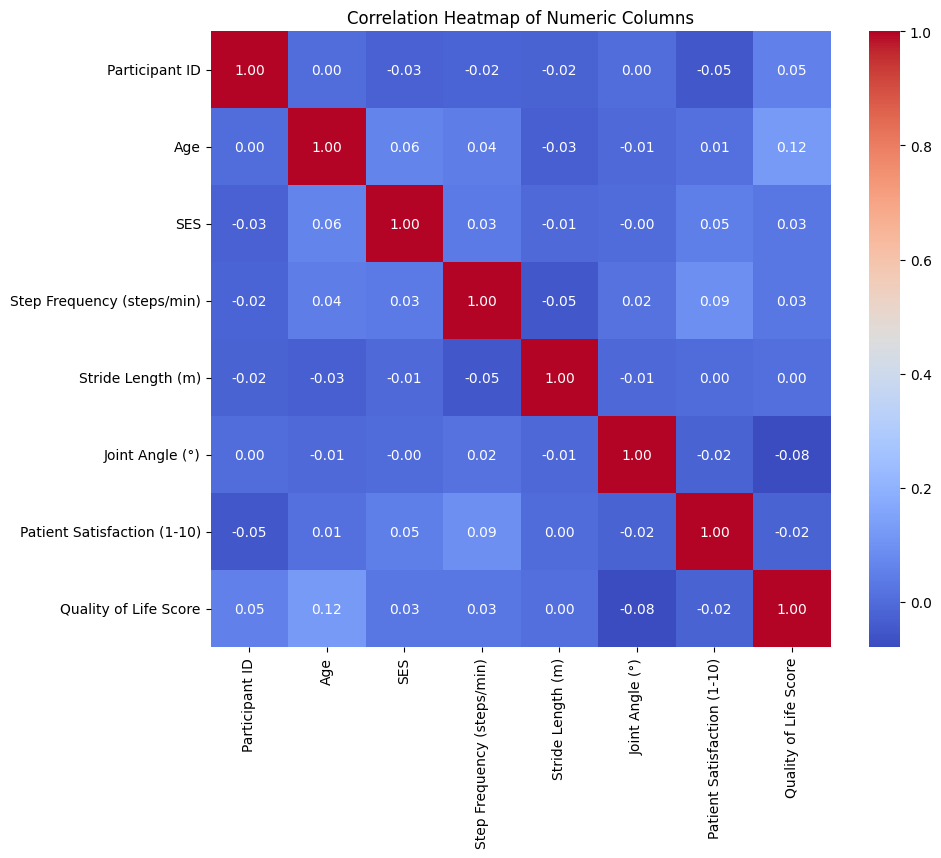

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = 'community_health_evaluation_dataset.csv'  # Replace with your file path
data = pd.read_csv(file_path)

# Select numeric columns for the heatmap
numeric_columns = data.select_dtypes(include=['number'])

# Create a heatmap for correlations between numeric columns
if not numeric_columns.empty and len(numeric_columns.columns) > 1:
    plt.figure(figsize=(10, 8))
    sns.heatmap(numeric_columns.corr(), annot=True, cmap='coolwarm', fmt=".2f")
    plt.title("Correlation Heatmap of Numeric Columns")
    plt.show()
else:
    print("Not enough numeric columns available for creating a heatmap.")

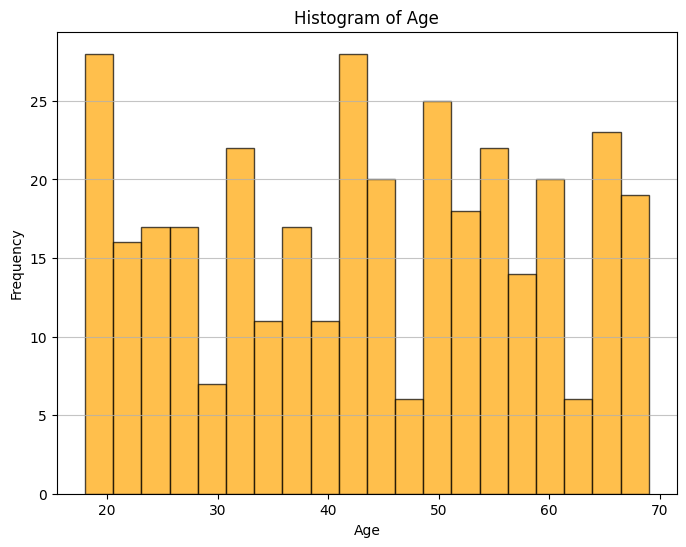

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
file_path = 'community_health_evaluation_dataset.csv'  # Replace with your file path
data = pd.read_csv(file_path)

# Create a histogram for the 'Age' column
if 'Age' in data.columns:
    plt.figure(figsize=(8, 6))
    plt.hist(data['Age'].dropna(), bins=20, edgecolor='black', alpha=0.7, color='orange')
    plt.title("Histogram of Age")
    plt.xlabel("Age")
    plt.ylabel("Frequency")
    plt.grid(axis='y', alpha=0.75)
    plt.show()
else:
    print("The 'Age' column is not available in the dataset.")



---



## Submitting Your Work

Submit your work as usual.